In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


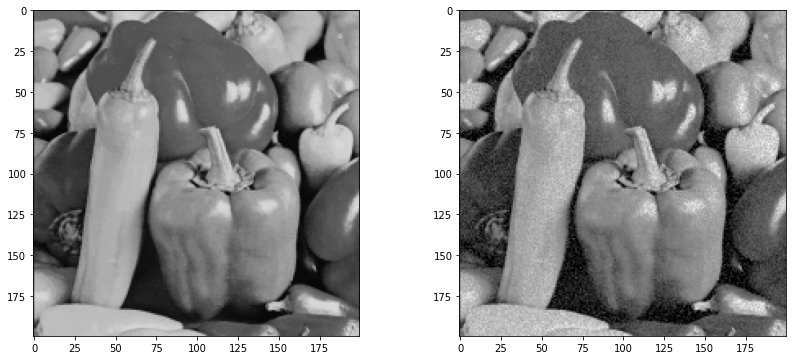

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from pyBilateralFilter import bilateral_filter

def add_noise_g(image, std=0.01):
    image_f = image.astype(np.float32) / 255 - 0.5
    row, col = image.shape
    mean = 0
    sigma = std ** 2 * 2
    gauss = np.random.normal(mean, sigma, (row, col)).reshape(row, col)
    image_noisy_f = np.clip(image_f * (1 + gauss), -0.5, 0.5)
    return ((image_noisy_f + 0.5) * 255).astype(np.uint8)

def cv2pil(image):
    return Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_raw = cv2.imread("data/peppers.png", cv2.IMREAD_GRAYSCALE)
image_noised = add_noise_g(image_raw, std=0.3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.imshow(cv2pil(image_raw))
ax2.imshow(cv2pil(image_noised))

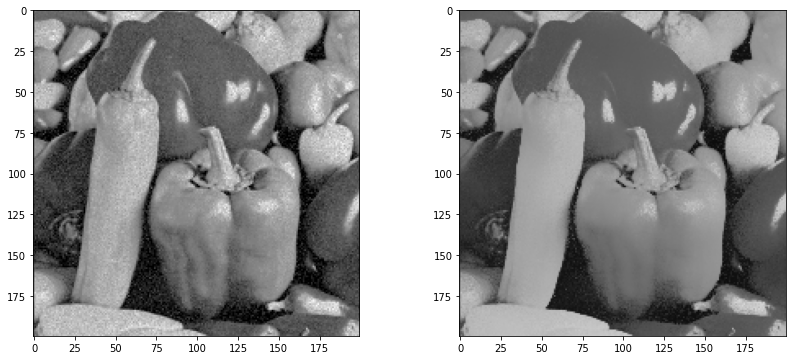

In [11]:
image_filtered = bilateral_filter(image_noised, 15, 10.0, 30.0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.imshow(cv2pil(image_noised))
ax2.imshow(cv2pil(image_filtered))